# <font size='100px' color ='deepskyblue'> Apprentissage non supervisé: Clustering </font>
### <font color='hotpink'> Ons SELLAMI et Anis MESSAOUDI - GL4 </font>

## <font color='darkorchid' size=6> Partie 1: Données de travail</font>

In [1]:
import pandas as pd
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)
pd.DataFrame(fromage.describe())

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


#### <font color='darkorange' size=3> 1. Comprendre et programmer les quelques lignes  Précédentes : comment sont réparties les données? Quels sont les attributsde ce jeu de données? </font>

In [2]:
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [3]:
print("Les données de la dataset fromage : ",fromage.shape)

Les données de la dataset fromage :  (29, 9)


***

* **La dataset fromage présente <font color='darkturquoise'> 29 instances</font> des <font color='darkturquoise'> 9 attributs </font> (<font color='slategrey'> calories,  sodium,  calcium,  lipides,  retinol,  folates,  proteines, cholesterol et magnesium </font>). Elle présente que des caractéristiques d'entrée (les attributs) et pas de variable de sortie (l'étiquette de classe). Ce sont des données <font color='darkturquoise'> non etiquetées (unlabeled data) </font> => Les modèles d'apprentissage non supervisé, contrairement à l'apprentissage supervisé, travaillent seuls pour découvrir la structure inhérente des données non étiquetées.**

***

#### <font color='darkorange' size=3> 2. Maintenant on veut visualiser la matrice de distribution de données: </font>

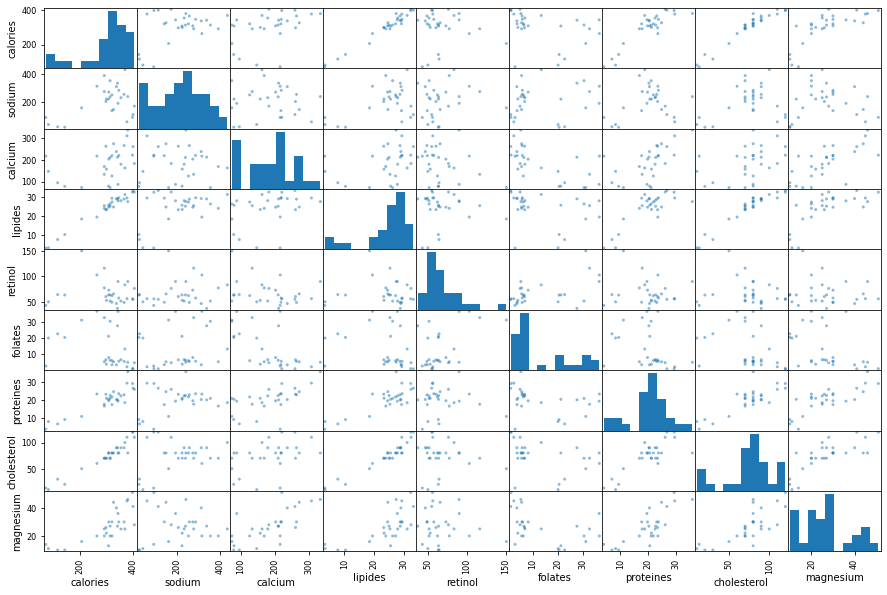

In [4]:
_ = pd.plotting.scatter_matrix(fromage, figsize=(15,10))

***

* **On remarque que certains attributs sont <font color='darkturquoise'> fortement corrélés</font> par exemple 'lipides' et 'cholesterol' ainsi que 'cholesterol' et 'calories'. Ça va résulter que la même information va peser 3 fois dans l'analyse.**
* **On remarque aussi qu'il y a une correlation entre groupe qui apparait par exemple entre 'proteines' et 'cholesterol'**

***

## <font color='darkorchid' size=6> Partie 2: Méthode des centres mobiles </font>

#### <font color='darkorange' size=3> 1. Comprendre et programmer les lignes suivantes : </font>

In [5]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
#declaration du modele
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
#distances aux centres de groupes des observations
print(kmeans.transform(fromage))

             Fromages
0            Parmesan
0            Beaufort
0         SaintPaulin
0            Vacherin
0            Emmental
0             Cheddar
0               Comte
0                Edam
1         Coulomniers
1            Pyrenees
1  Fr.chevrepatemolle
1         PontlEveque
1            Chaource
1           Chabichou
1                Tome
1             Babybel
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3          Rocquefort
3           Reblochon
3         CarredelEst
3           Maroilles
3              Cantal
3           Camembert
3                Bleu
3             Morbier
3         Fr.fondu.45
[[285.36163076 145.45179721 384.27301005 127.66904456]
 [118.43379084  84.03758274 303.10311983  93.02921551]
 [ 56.72603293 205.07356073 349.91323389 241.39308525]
 [200.30401971 150.63556291 393.76898843  39.24299576]
 [210.31138298 134.45026148 332.43471728  84.3287841 ]
 [111.73150994 155.73016828 371.97076666 109.43789941]
 [182.8059

***

* **Le programme crée un modèle pour un ensemble de 4 clusters. Il fait l'apprentissage sur la dataset fromage. L'algorithme regroupe chaque point de données avec le centroid le plus proche (c'est-à-dire le plus proche en distance). On utilise argsort pour effectuer un tri indirect selon le groupe. Il renvoie un tableau d'indices de la même forme que le tableau qui le trierait (kmeans.labels_). On affiche les observations avec leurs groupes et puis on affiche pour chaque instance un array qui contient les distances entre cette observation et chaque cluster en utilisant la méthode transform.**

***

#### <font color='darkorange' size=3> 2. Donnez les attributs des centres de chaque cluster.</font>

In [6]:
print(kmeans.cluster_centers_)

[[363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [305.         224.375      130.375       25.15        81.3875
   18.0375      19.6         73.75        23.        ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [327.         327.72222222 194.67777778  26.87777778  64.31111111
   15.13333333  20.75555556  81.11111111  26.88888889]]


### <font color='limegreen' size=4> Aide à la détection du nombre adéquat de groupes </font>

#### <font color='darkorange' size=3> 1. Comprendre et programmer les lignes suivantes :</font>

[0.50681355 0.37299771 0.3369907  0.35737616 0.32609984 0.2888388
 0.29480635 0.2872981  0.24638892]


<function matplotlib.pyplot.show(close=None, block=None)>

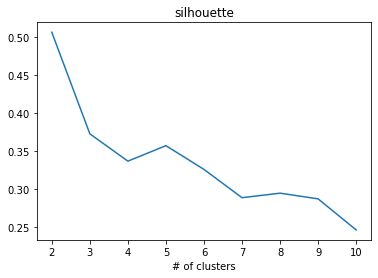

In [7]:
from sklearn import metrics
#utilisation de la métrique "silhouette" 
res = np.arange(9,dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters =k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
#graphique
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

***

* **Ce programme exécute l'algorithme k-means sur la dataset fromage 9 fois pour des k clusters qui varient de 2 à 10 et calcule à chaque fois le coefficient/ métrique silhouette. Puis il affiche les différents coefficients et les plote**

***

#### <font color='darkorange' size=3> 2. Quelle est la meilleure valeur de k (nombre de clusters) selon la métrique silhouette? </font>

***
* **La partition en <span style="text-decoration:underline; color:darkturquoise">k = 2</span> groupes semble la meilleure au sens de la métrique silhouette (elle à la métrique silhouette la plus élevée)**

***

## <font color='darkorchid' size=6> Partie 3: Classification ascendante hiérarchique </font>

#### <font color='darkorange' size=3> 1. Comprendre et programmer les lignes suivantes :</font>

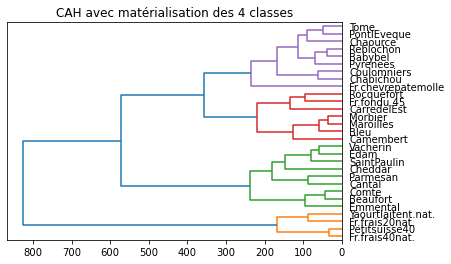

Les groupes CAH [3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]


,Fromages
1,Yaourtlaitent.nat.
1,Petitsuisse40
1,Fr.frais40nat.
1,Fr.frais20nat.
2,SaintPaulin
2,Beaufort
2,Cantal
2,Parmesan
2,Cheddar
2,Comte


In [8]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#générer la matrice des liens
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print('Les groupes CAH',groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
pandas.DataFrame(fromage.index[idg],groupes_cah[idg])

***


* **Ce programme génère une matrice des liens Z codant le clustering hiérarchique. Puis, il affiche le dendrogramme en utilisant Z, avec "labels" égale aux observations de la dataset fromage, "orientation" est "left" pour tracer la racine à gauche et tracer les liens descendants à droite et finalement, "color_threshold = 255".**
* **Ensuite, on forme et affiche des clusters plats à partir du regroupement hiérarchique défini par la matrice des liens données, avec "t (le seuil) = 255" et "criterion='distance'" qui indique que les observations originales dans chaque cluster plat n'ont pas une distance supérieure à t.** 
* **On tri le résultat et on affiche les observations avec leurs clusters dans un DataFrame.**

***

#### <font color='darkorange' size=3> 2. Interpréter les résultats </font>

***
* **Une division en <font color='darkturquoise'> 4 groupes </font> est suggérée par le dendrogramme. On note que le groupe des fromages de couleur orange, tout en bas,  semble être très distinct des autres, au point qu'on aurait dû répartir les fromages en 2 groupes seulement.**
***

#### <font color='darkorange' size=3> 3. Donnez la correspondance entre les groupes de la CAH et les clusters de Kmeans en utilisant la méthode pandas.crosstab </font>

In [9]:
pandas.crosstab(groupes_cah,kmeans.labels_,rownames=['CAH'],colnames=['K-means'])

K-means,0,1,2,3
CAH,,,,
1,0,0,4,0
2,8,0,0,1
3,0,0,0,7
4,0,8,0,1


## <font color='darkorchid' size=6> Partie 4: Interprétation des classes </font>

#### <font color='darkorange' size=3> 1. Comprendre et programmer les lignes suivantes :</font>

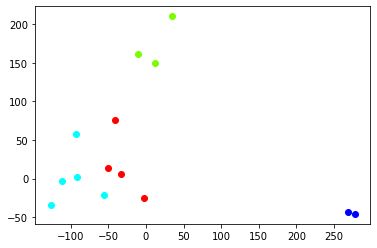

In [10]:
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

***
* **Ce programme va diminuer les composants en 2 en utilisant PCA (Analyse des composants principaux) puis il va projeter les données dans le plan factoriel avec un code couleur différent selon le groupe.**
***

#### <font color='darkorange' size=3> 2. Interprétez les résultats </font>

***
* **On constate qu'il y a un problème. Le groupe de fromages n°1 en blue écrase les données existantes et emballe les fromages restants dans la partie gauche du scatteplot.
En fait, une fois que l'on comprend la nature du groupe n°1 des fromages, les autres du premier plan factoriel deviennent plus difficiles à appréhender.**
***

## <font color='limegreen' size=5> Appliquez sur le même jeu de données, la méthode de clustering CAH du package sklearn.cluster.AgglomerativeClustering. Comparez les résultats.</font>

#### <font color='palevioletred'> 4 clusters </font>

In [11]:
from sklearn.cluster import AgglomerativeClustering

acluster = AgglomerativeClustering(n_clusters=4).fit(fromage)

In [12]:
print(acluster.labels_)

[1 2 0 1 1 0 2 2 0 0 2 0 0 2 1 3 3 1 1 0 3 2 2 2 1 0 2 0 3]


In [13]:
idk = np.argsort(acluster.labels_)
pd.DataFrame(fromage.index[idk],acluster.labels_[idk])

,Fromages
0,SaintPaulin
0,Beaufort
0,Parmesan
0,Cantal
0,Cheddar
0,Comte
0,Vacherin
0,Edam
0,Emmental
1,CarredelEst


In [14]:
pandas.crosstab(acluster.labels_,kmeans.labels_,rownames=['Agglomerative Clustering'],colnames=['K-means'])

K-means,0,1,2,3
Agglomerative Clustering,,,,
0,8,0,0,1
1,0,0,0,7
2,0,8,0,1
3,0,0,4,0


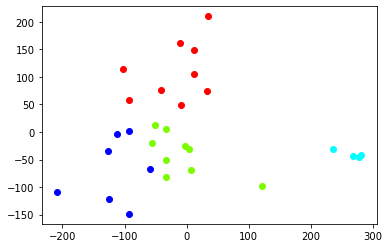

In [15]:
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[acluster.labels_==k,0],acp[acluster.labels_==k,1],c=couleur)
plt.show()

[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 0.26090835 0.25588299]


<function matplotlib.pyplot.show(close=None, block=None)>

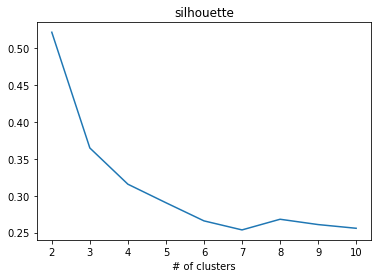

In [16]:
from sklearn import metrics
#utilisation de la métrique "silhouette" 
res = np.arange(9,dtype ="double")
for k in np.arange(9):
    ac = cluster.AgglomerativeClustering(n_clusters =k+2)
    ac.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,ac.labels_)
print (res)
#graphique
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

#### <font color='palevioletred'> valeurs par défaut : (2 clusters) : </font>
<font color='grey'> **AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)** </font>

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
0         CarredelEst
0          Rocquefort
0             Morbier
0           Maroilles
0         Fr.fondu.45
0           Camembert
0                Bleu
0         Coulomniers
0            Chaource
0           Chabichou
0         PontlEveque
0            Pyrenees
0           Reblochon
0             Babybel
0                Tome
0  Fr.chevrepatemolle
1      Fr.frais20nat.
1      Fr.frais40nat.
1       Petitsuisse40
1  Yaourtlaitent.nat.


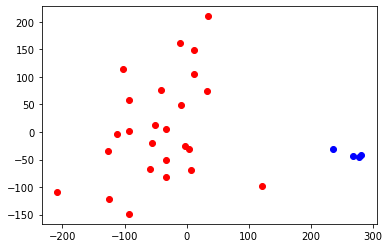

In [17]:
dacluster = AgglomerativeClustering().fit(fromage)
idx = np.argsort(dacluster.labels_)
print(pd.DataFrame(fromage.index[idk],dacluster.labels_[idk]))
# interprétation des classes
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
 plt.scatter(acp[dacluster.labels_==k,0],acp[dacluster.labels_==k,1],c=couleur)
plt.show()

## <font color='limegreen' size=5> Implémentez un algorithme hiérarchique descendant (divisive clustering) basé sur l’utilisation de k-means </font>

Etape :  1


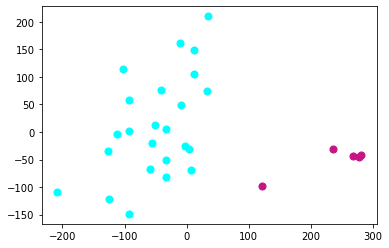

Etape :  2


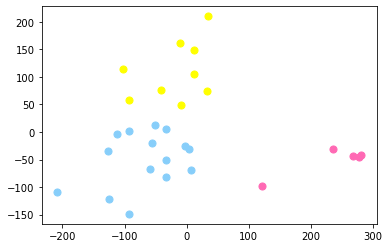

Etape :  3


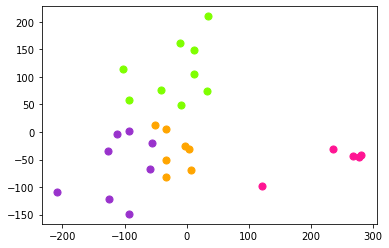

In [18]:
from sklearn import cluster
from itertools import cycle

def diana(df: pd.DataFrame, n_clusters: int , steps: bool = False):
  df = df.reset_index(drop=True)
  df["idx"] = df.index
  clusters = [df]
  acp = PCA(n_components =2).fit_transform(df.drop(["idx"], axis=1))
  colors = cycle(['#c71585','cyan','hotpink', '#87cefa', "yellow", "#ff1493", "#7fff00", "#9932cc", "orange"])

  i = 0
  while len(clusters) < n_clusters:
    i = i + 1
    
    # trouver le cluster ayant la taille la plus grande pour le diviser
    cluster_to_split_idx = np.argmax([len(cluster.index) for cluster in clusters])
    df = clusters[cluster_to_split_idx]
    
    # diviser en utilisant KMeans
    kmeans = cluster.KMeans(n_clusters = 2)
    kmeans.fit(df.drop(["idx"], axis=1))
    cluster1 = df[kmeans.labels_==0].copy().reset_index(drop=True)
    cluster2 = df[kmeans.labels_==1].copy().reset_index(drop=True)

    # supprimer le cluster choisit pour la division
    # ajouter les deux nouveaux clusters
    del clusters[cluster_to_split_idx]
    clusters.append(cluster1)
    clusters.append(cluster2)

    # si steps est true, plotter les scatters des itérations
    if steps:
      print("Etape : ", i)
      for clt, color in zip(clusters, colors):
        plt.scatter(acp[list(clt["idx"]),0], acp[list(clt["idx"]),1],c=color,s=50)
      plt.show()

diana(fromage, 4, steps=True)